# Training

In [1]:
!bash train.sh

----------------- Options ---------------
                  alpha_A: 0.1                           	[default: 0.01]
                  alpha_B: 0.1                           	[default: 0.01]
                alpha_gan: 1.0                           	[default: 0.2]
               batch_size: 16                            	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
            cycle_gan_dir: ./checkpoints/example/        	[default: /root/autodl-tmp/pytorch-CycleGAN-and-pix2pix/checkpoints/vangogh2photo/]
                 dataroot: ./datasets/example            	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400              

# Testing

In [3]:
!bash test.sh

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/example            	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

<a href="./results/latent-example/test_latest/index.html">A visualization result of an HTML</a>

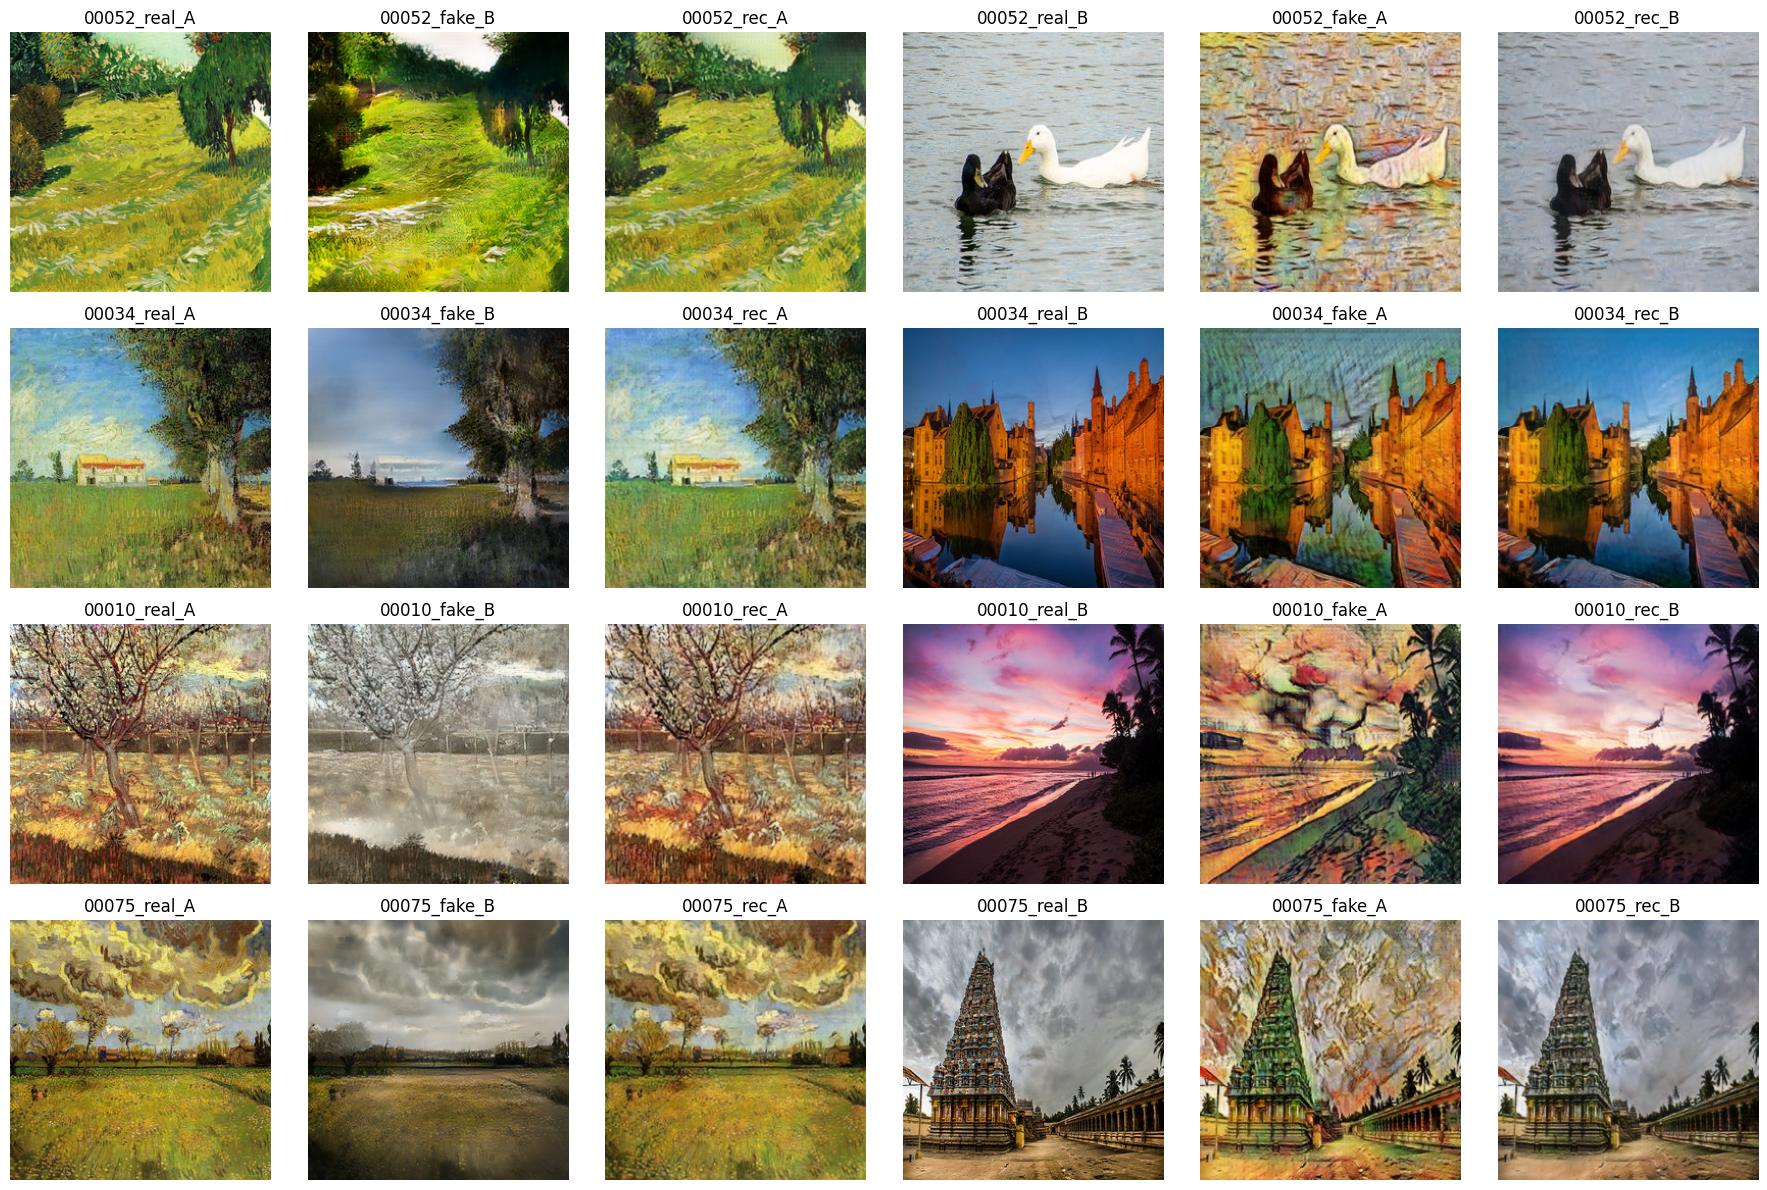

In [6]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

image_dir = "./results/latent-example/test_latest/images"
all_files = [f for f in os.listdir(image_dir) if f.endswith(".png")]


def parse_filename(filename):
    base_name = os.path.splitext(filename)[0]
    parts = base_name.split('_', 2)
    image_id = parts[0]
    suffix = "_".join(parts[1:])
    return image_id, suffix

images_dict = {}
for f in all_files:
    img_id, img_suffix = parse_filename(f)
    if img_id not in images_dict:
        images_dict[img_id] = {}
    images_dict[img_id][img_suffix] = f

all_ids = list(images_dict.keys())
random.shuffle(all_ids)
sample_count = 4
sample_ids = all_ids[:sample_count]

display_order = ["real_A", "fake_B", "rec_A", "real_B", "fake_A", "rec_B"]

rows = len(sample_ids)
cols = len(display_order)
fig, axes = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))

for row_idx, img_id in enumerate(sample_ids):
    for col_idx, suffix in enumerate(display_order):
        ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]
        filename = images_dict[img_id].get(suffix, None)
        if filename is not None:
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path)
            ax.imshow(img)
        ax.set_title(f"{img_id}_{suffix}")
        ax.axis("off")

plt.tight_layout()
plt.show()